In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, lfilter
import pywt
from sklearn.decomposition import PCA
# from PyEMD import EMD
from vmdpy import VMD
from scipy.signal import spectrogram
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


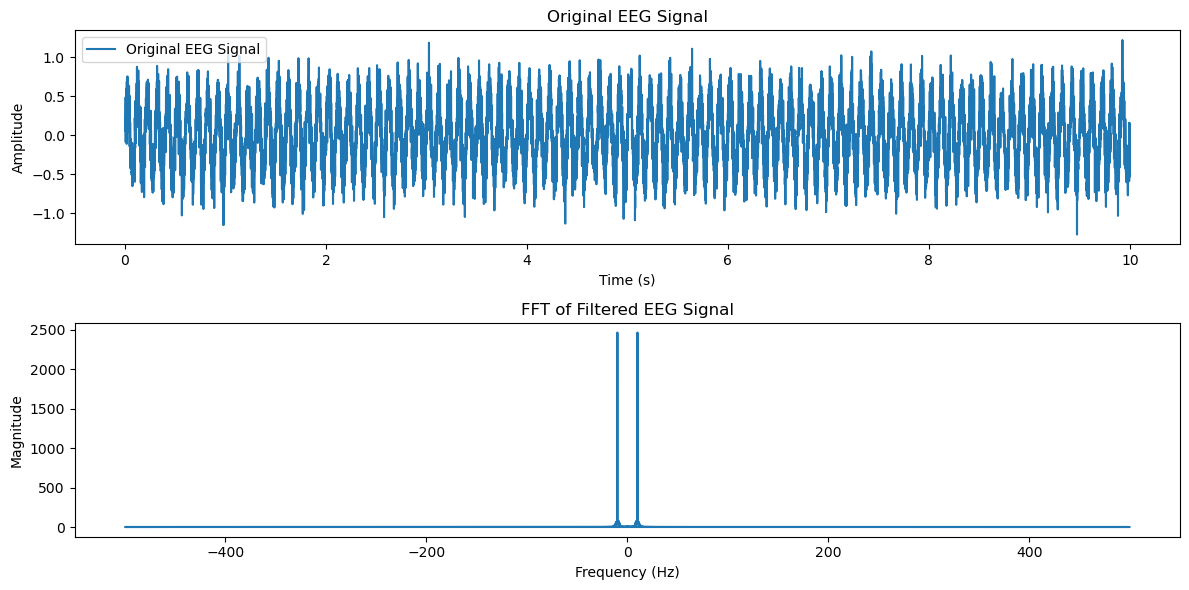

In [6]:
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 10, 1/fs)  # Time vector
f_signal = 10  # Frequency of the signal (Hz)
eeg_signal = 0.5 * np.sin(2 * np.pi * f_signal * t) + 0.2 * np.random.randn(len(t))

# Apply a simple bandpass filter to focus on a specific frequency range
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

lowcut = 8  
highcut = 12  
filtered_signal = butter_bandpass_filter(eeg_signal, lowcut, highcut, fs)

# Perform FFT on the filtered EEG signal
fft_result = fft(filtered_signal)
frequencies = np.fft.fftfreq(len(fft_result), d=1/fs)

# Plot the original EEG signal and its FFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, label='Original EEG Signal')
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('FFT of Filtered EEG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


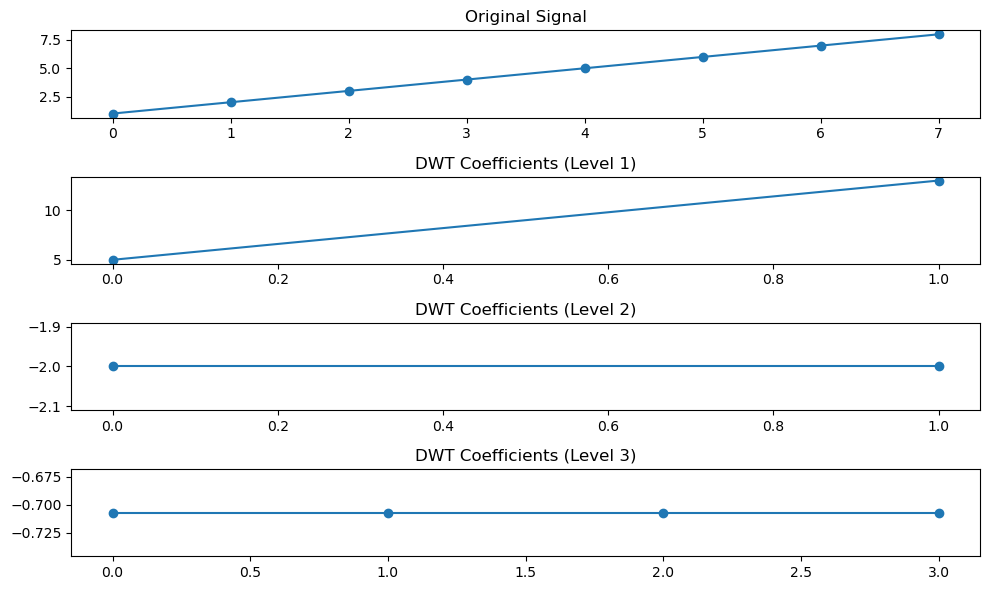

In [2]:
signal = np.array([1, 2, 3, 4, 5, 6, 7, 8])
wavelet = 'db1'  
level = 2  
coeffs = pywt.wavedec(signal, wavelet, level=level)

plt.figure(figsize=(10, 6))

plt.subplot(level + 2, 1, 1)
plt.plot(signal, marker='o', linestyle='-')
plt.title('Original Signal')

for i in range(level + 1):
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(coeffs[i], marker='o', linestyle='-')
    plt.title(f'DWT Coefficients (Level {i+1})')

plt.tight_layout()
plt.show()


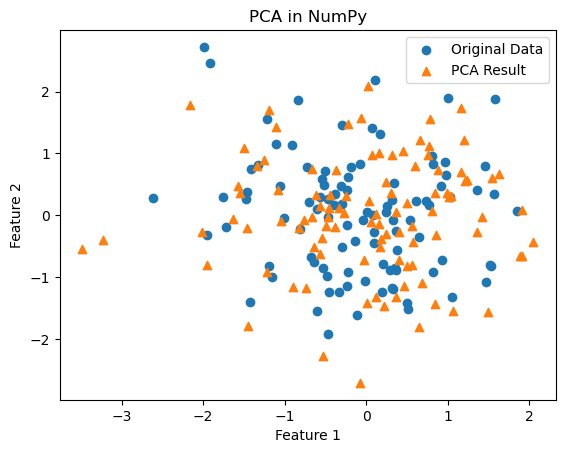

In [4]:
np.random.seed(42)
data = np.random.randn(2, 100)  # 2D data with 100 samples

# Standardize the data
mean_vals = np.mean(data, axis=1)
std_devs = np.std(data, axis=1)
standardized_data = ((data.T - mean_vals) / std_devs).T

# Calculate the covariance matrix
cov_matrix = np.cov(standardized_data)

# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Project the data onto the principal components
pca_result = np.dot(eigenvectors.T, standardized_data)

# Plot the original data and PCA result
plt.scatter(data[0], data[1], label='Original Data')
plt.scatter(pca_result[0], pca_result[1], label='PCA Result', marker='^')
plt.legend()
plt.title('PCA in NumPy')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [33]:
t = np.linspace(0, 1, 100)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 20 * t)

# Set default parameters for VMD
f = 2  # Mode number
alpha = 2000  # Penalization for the influence of each mode
tau = 0.  # Noise-tolerance (no strict fidelity enforcement)
K = 4  # Number of modes
DC = 0  # DC component (no trend)
init = 1  # Initialization of omega_k
tol = 1e-7  # Tolerance
k = 4

# Perform VMD
# vmd = VMD(f, alpha, tau, K, DC, init, tol)
# modes, trend = vmd(signal)
# modes, trend = vmd(signal)

# # Plot the original signal, modes, and trend
# plt.figure(figsize=(10, 8))

# plt.subplot(len(modes) + 2, 1, 1)
# plt.plot(t, signal, label='Original Signal')
# plt.legend()

# for i, mode in enumerate(modes):
#     plt.subplot(len(modes) + 2, 1, i + 2)
#     plt.plot(t, mode, label=f'Mode {i + 1}')
#     plt.legend()

# plt.subplot(len(modes) + 2, 1, len(modes) + 2)
# plt.plot(t, trend, label='Trend')
# plt.legend()

# plt.tight_layout()
# plt.show()

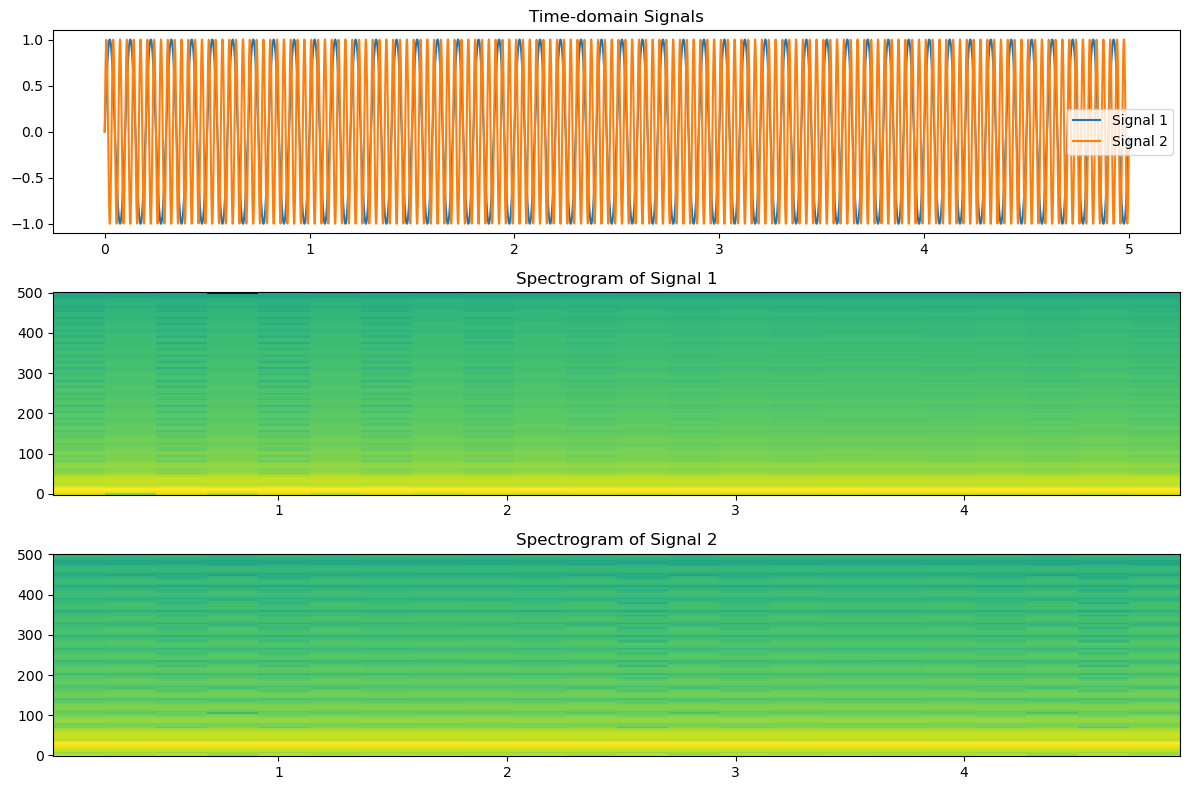

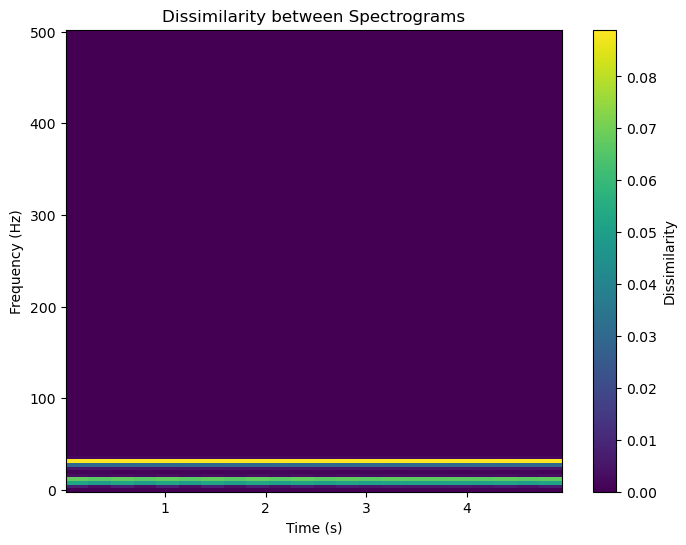

In [35]:
fs = 1000  # Sampling frequency
t = np.arange(0, 5, 1/fs)  # Time vector
f1 = 10  # Frequency of the first signal
f2 = 30  # Frequency of the second signal
signal1 = np.sin(2 * np.pi * f1 * t)
signal2 = np.sin(2 * np.pi * f2 * t)

# Compute spectrograms
frequencies1, times1, Sxx1 = spectrogram(signal1, fs)
frequencies2, times2, Sxx2 = spectrogram(signal2, fs)

# Compute dissimilarity as the absolute difference between spectrograms
dissimilarity = np.abs(Sxx1 - Sxx2)

# Plot the signals and their spectrograms
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal1, label='Signal 1')
plt.plot(t, signal2, label='Signal 2')
plt.legend()
plt.title('Time-domain Signals')

plt.subplot(3, 1, 2)
plt.pcolormesh(times1, frequencies1, 10 * np.log10(Sxx1), shading='auto')
plt.title('Spectrogram of Signal 1')

plt.subplot(3, 1, 3)
plt.pcolormesh(times2, frequencies2, 10 * np.log10(Sxx2), shading='auto')
plt.title('Spectrogram of Signal 2')

plt.tight_layout()
plt.show()

# Plot the dissimilarity between spectrograms
plt.figure(figsize=(8, 6))
plt.pcolormesh(times1, frequencies1, dissimilarity, shading='auto')
plt.title('Dissimilarity between Spectrograms')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Dissimilarity')
plt.show()

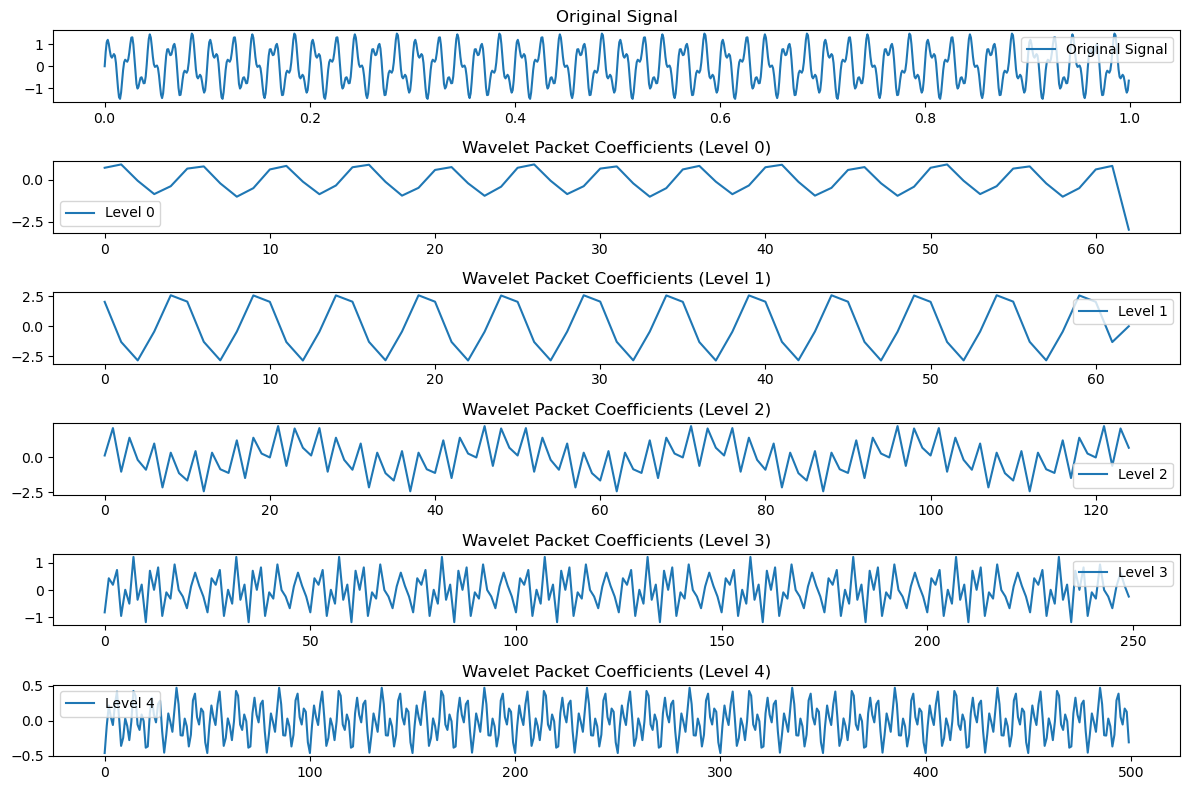

In [36]:
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)

# Define wavelet and level of decomposition
wavelet = 'db1'  # Daubechies wavelet with one vanishing moment
level = 4

# Perform Wavelet Packet Decomposition
coeffs = pywt.wavedec(signal, wavelet, mode='cpd', level=level)

# Visualize the decomposition
plt.figure(figsize=(12, 8))

# Plot the original signal
plt.subplot(level + 2, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.legend()
plt.title('Original Signal')

# Plot the wavelet packet coefficients
for i in range(level + 1):
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(coeffs[i], label=f'Level {i}')
    plt.legend()
    plt.title(f'Wavelet Packet Coefficients (Level {i})')

plt.tight_layout()
plt.show()

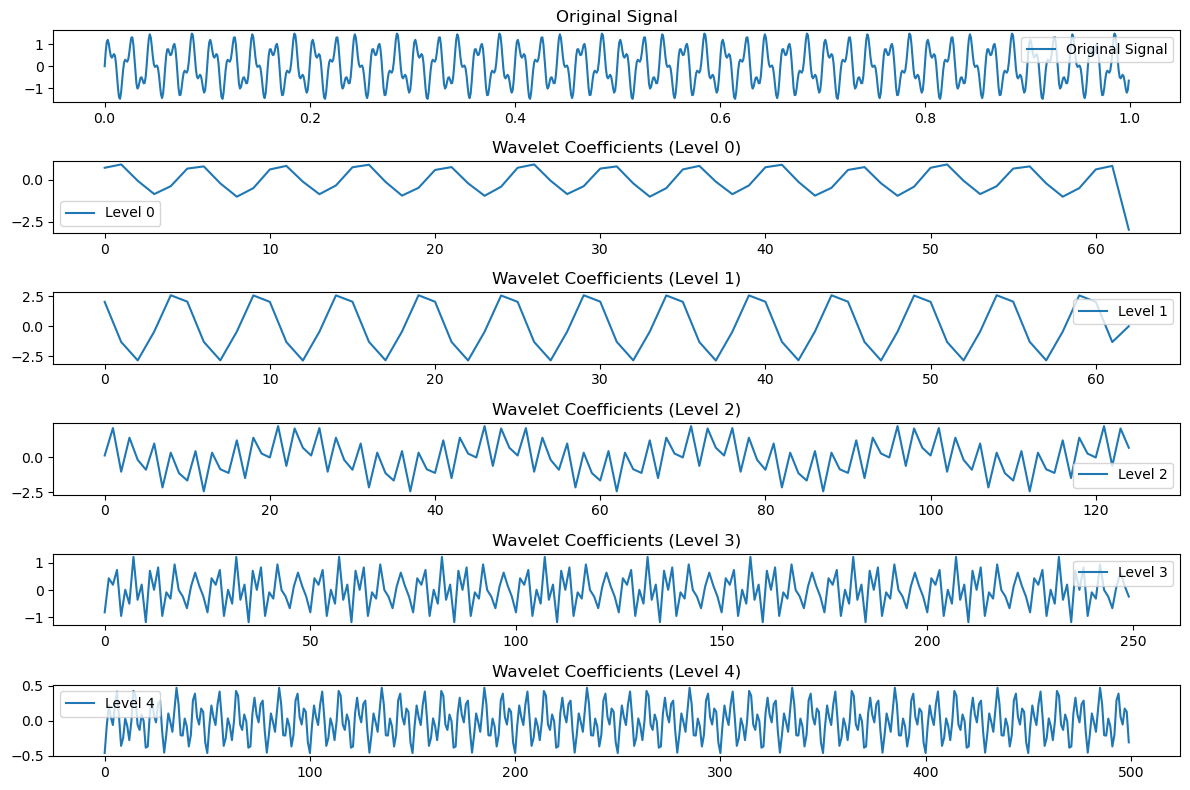

In [37]:
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)

# Define wavelet and level of decomposition
wavelet = 'db1'  # Daubechies wavelet with one vanishing moment
level = 4

# Perform Wavelet Transform
coeffs = pywt.wavedec(signal, wavelet, mode='cpd', level=level)

# Visualize the decomposition
plt.figure(figsize=(12, 8))

# Plot the original signal
plt.subplot(level + 2, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.legend()
plt.title('Original Signal')

# Plot the wavelet coefficients
for i in range(level + 1):
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(coeffs[i], label=f'Level {i}')
    plt.legend()
    plt.title(f'Wavelet Coefficients (Level {i})')

plt.tight_layout()
plt.show()

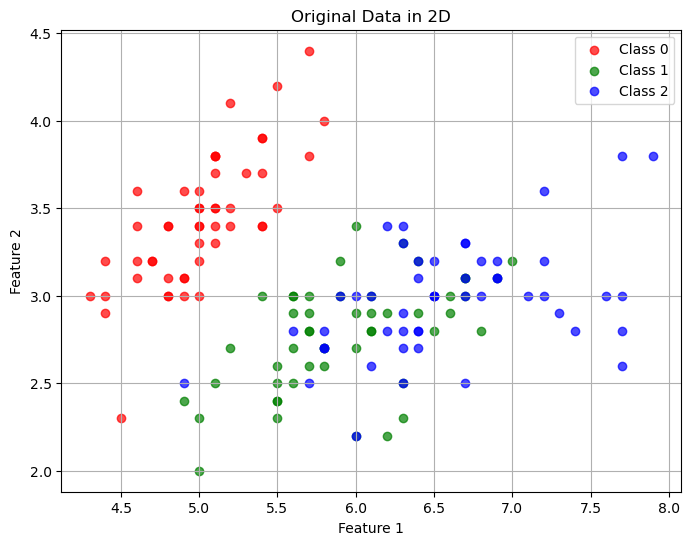

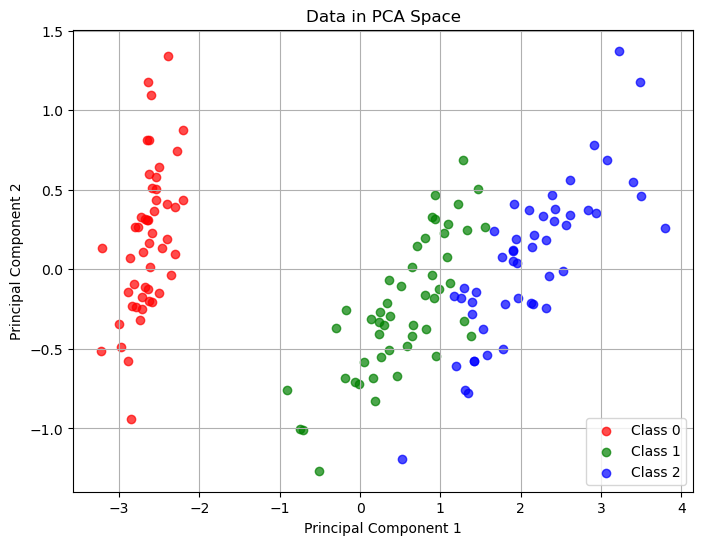

In [39]:
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA with two components (you can change the number of components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the original data and the transformed data in the PCA space
plt.figure(figsize=(8, 6))

colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=colors[i], label=f'Class {i}', alpha=0.7)

plt.title('Original Data in 2D')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plot the data in the PCA space
plt.figure(figsize=(8, 6))

for i in range(3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=f'Class {i}', alpha=0.7)

plt.title('Data in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()